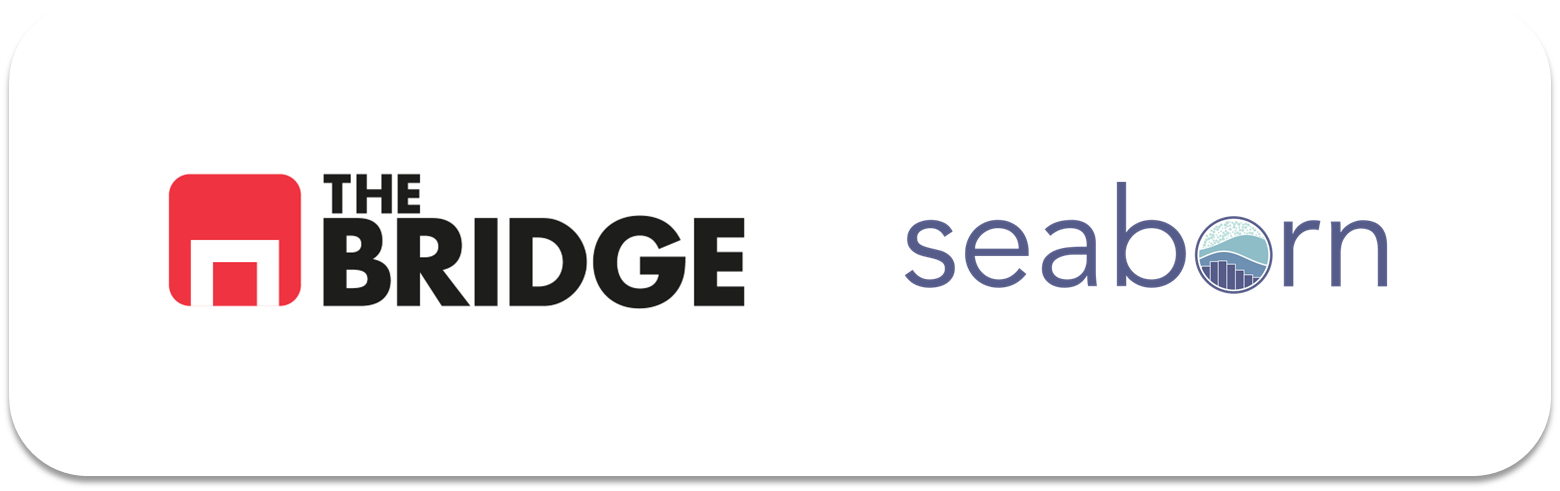

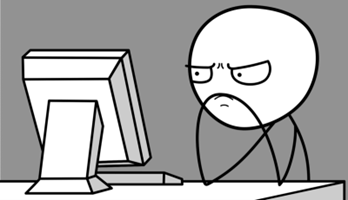

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de una sola variable, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Bitcoin, "./data/BTC.csv"
3. Viajes, "./data/dataset_viajes_jun23"

En el dataset de Bitcoin, convierte la columna "date" a datetime y luego hazla el índice del dataframe.

In [10]:
df_t = pd.read_csv("./data/titanic.csv")
df_b = pd.read_csv("./data/BTC.csv")
df_v = pd.read_csv("./data/dataset_viajes_jun23.csv")

In [11]:
df_b["fecha"] = pd.to_datetime(df_b.date)

In [12]:
df_b.set_index("fecha", inplace=True)
df_b

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
fecha,,,,,,,,,
2022-03-01,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
2022-02-28,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2022-02-27,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
2022-02-26,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
2022-02-25,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...,...
2014-12-02,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2014-12-01,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2014-11-30,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03


### Ejercicio 2

Crea una función a la que puedas pasar como argumentos un dataframe y una lista de columnas categóricas y dibuje una matriz de gráficas de 2 columnas y tantas filas como necesite para pintar el diagrama de barras de las frecuencias absolutas de las columnas pasadas como argumento. No hace falta que compruebes que las columnas son categóricas. Y que ponga como título de cada figura "Frecuencias Absolutas de \<nombre de la columna>\. Utiliza Seaborn para dibujar las gráficas y matplotlib para lo que necesites (pero no para dibujar las gráficas)

In [33]:
def freabs (df, lista):
    filas = len(lista) // 2 + len(lista)%2
    fig,axs = plt.subplots(filas, 2, figsize=(15,12))
    for i in range(len(lista)):
        sns.countplot(x = lista[i], data = df, ax = axs[i//2, i%2], hue = lista[i], legend = False )
        axs[i//2, i%2].set_title(f"Frecuencias Absolutas de {lista[i]}")
        axs[i//2, i%2].set_ylabel("Numero de ocurrencias")   

### Ejercicio 3

Utiliza la función anterior para pintar las gráficas de frecuencias de las variables categóricas `alive,embark_town,who` del dataset de titanic


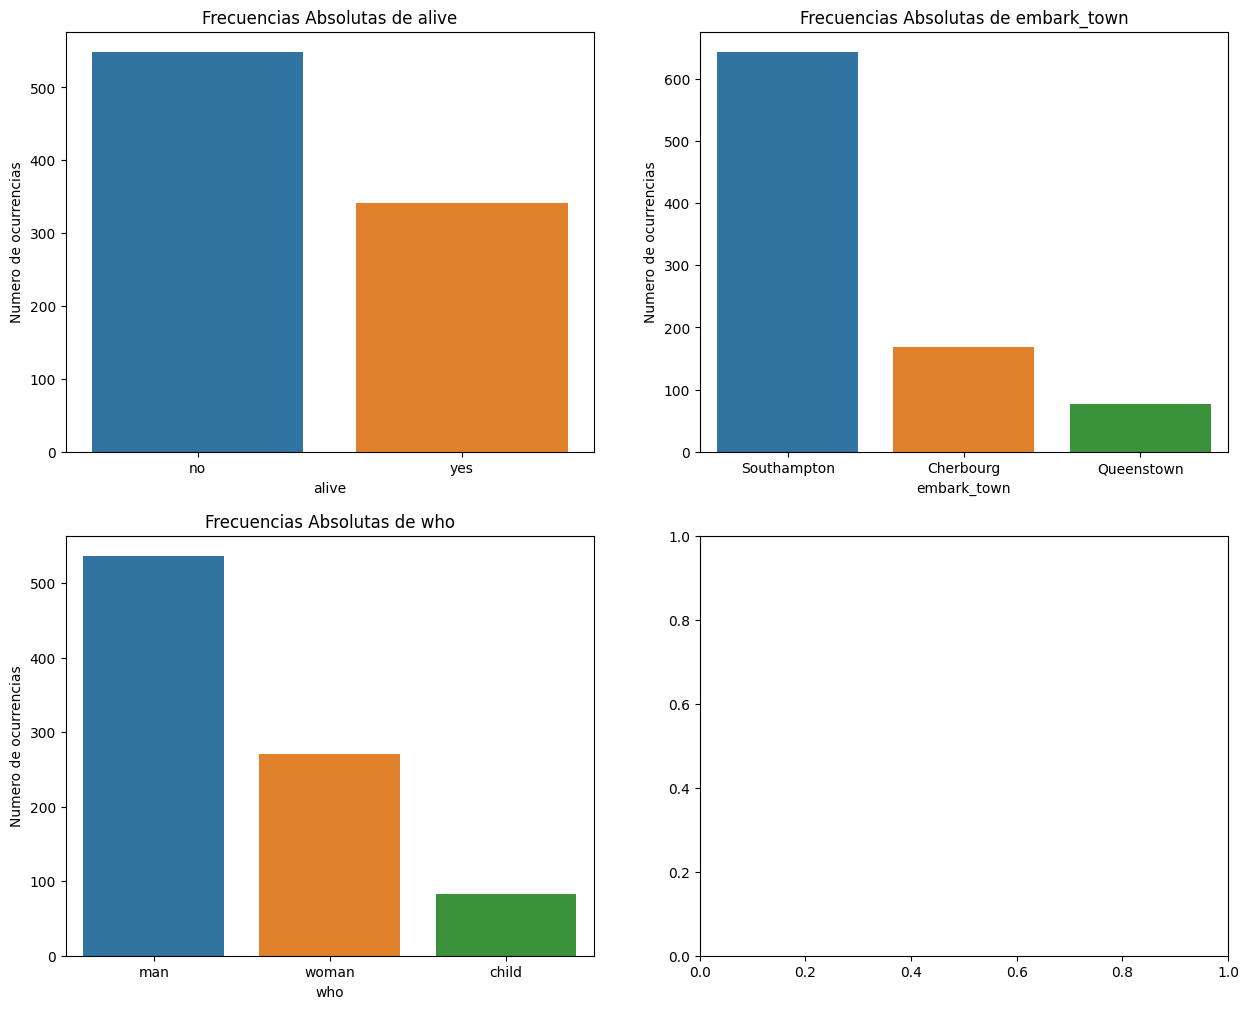

In [34]:
freabs (df_t, ["alive","embark_town","who"])

### Ejercicio 4

Crea una función similar a la del ejercicio 4, pero que esta vez pinte el histograma de una lista de columnas numéricas, añade un argumento para poder indicar el número de bins. Añade también un argumento que permita incluir la función de densidad o no en la figura. De nuevo usa Seaborn para crear las figuras. También debe cumplirse el que pinte cada grafica en una matriz de 2 columnas como mucho y todas las filas que necesites.

In [39]:
def histog (df, lista, b, k):
    filas = len(lista) // 2 + len(lista)%2
    fig,axs = plt.subplots(filas, 2, figsize=(15,12))
    for i in range(len(lista)):
        sns.histplot(x = lista[i], data = df, ax = axs[i//2, i%2], bins=b, kde = k)
        axs[i//2, i%2].set_title(f"Valor de {lista[i]}")
        axs[i//2, i%2].set_ylabel("Numero de ocurrencias")


### Ejercicio 5

Aplica la función del ejercicio anterior para pintar los histogramas de las columnas "ingresos", "consumo_kg" y "duracion" del dataset de viajes pero aplicando la siguiente lista de bins [10,30,60]. Aunque no seamos muy pro-histrogramas, ¿con cuál las posibles gráficas te quedarías para visualizar los valores de cada variable?

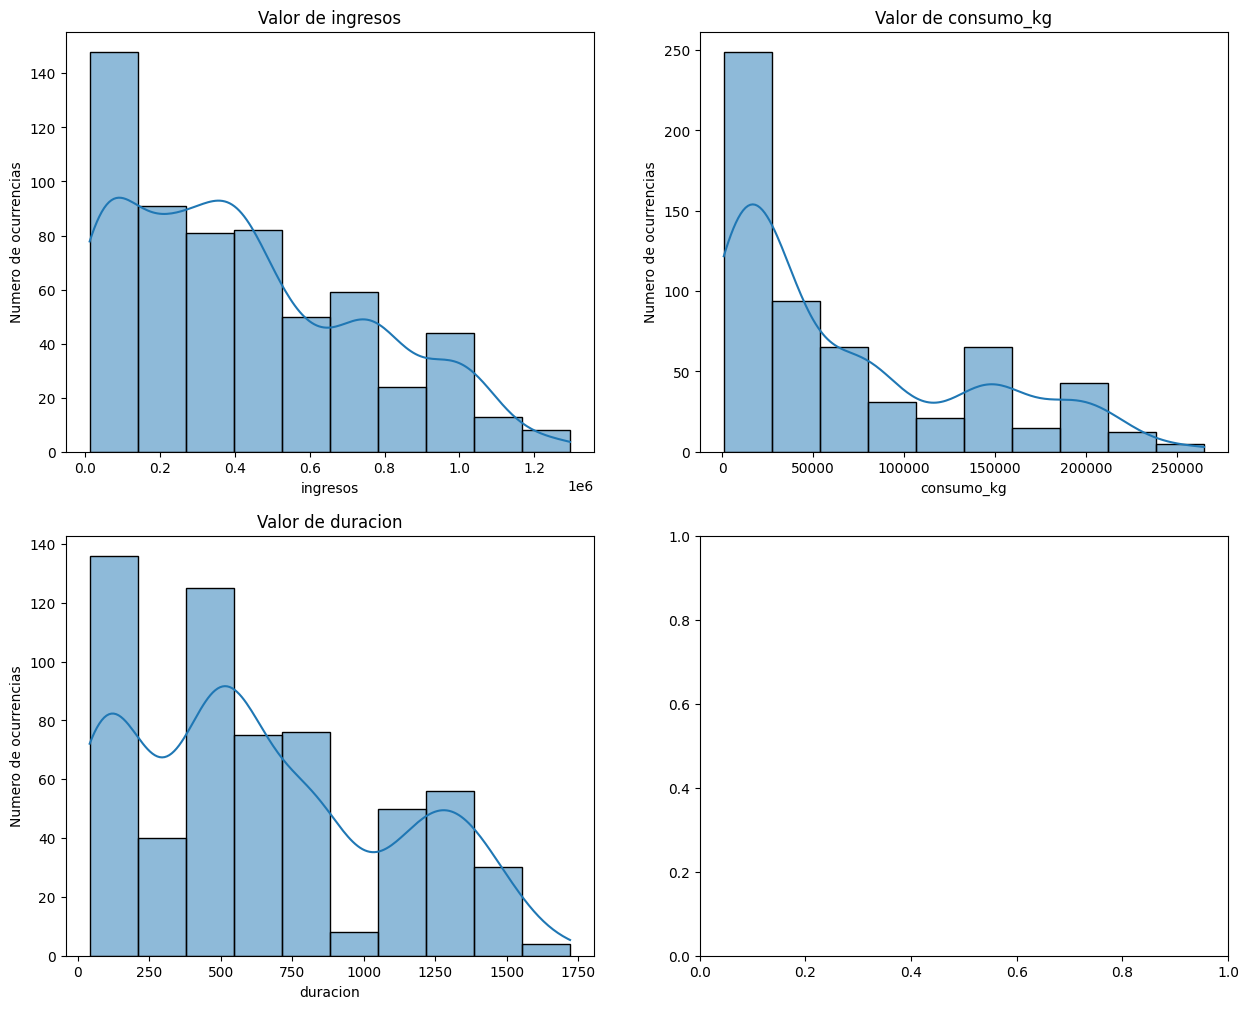

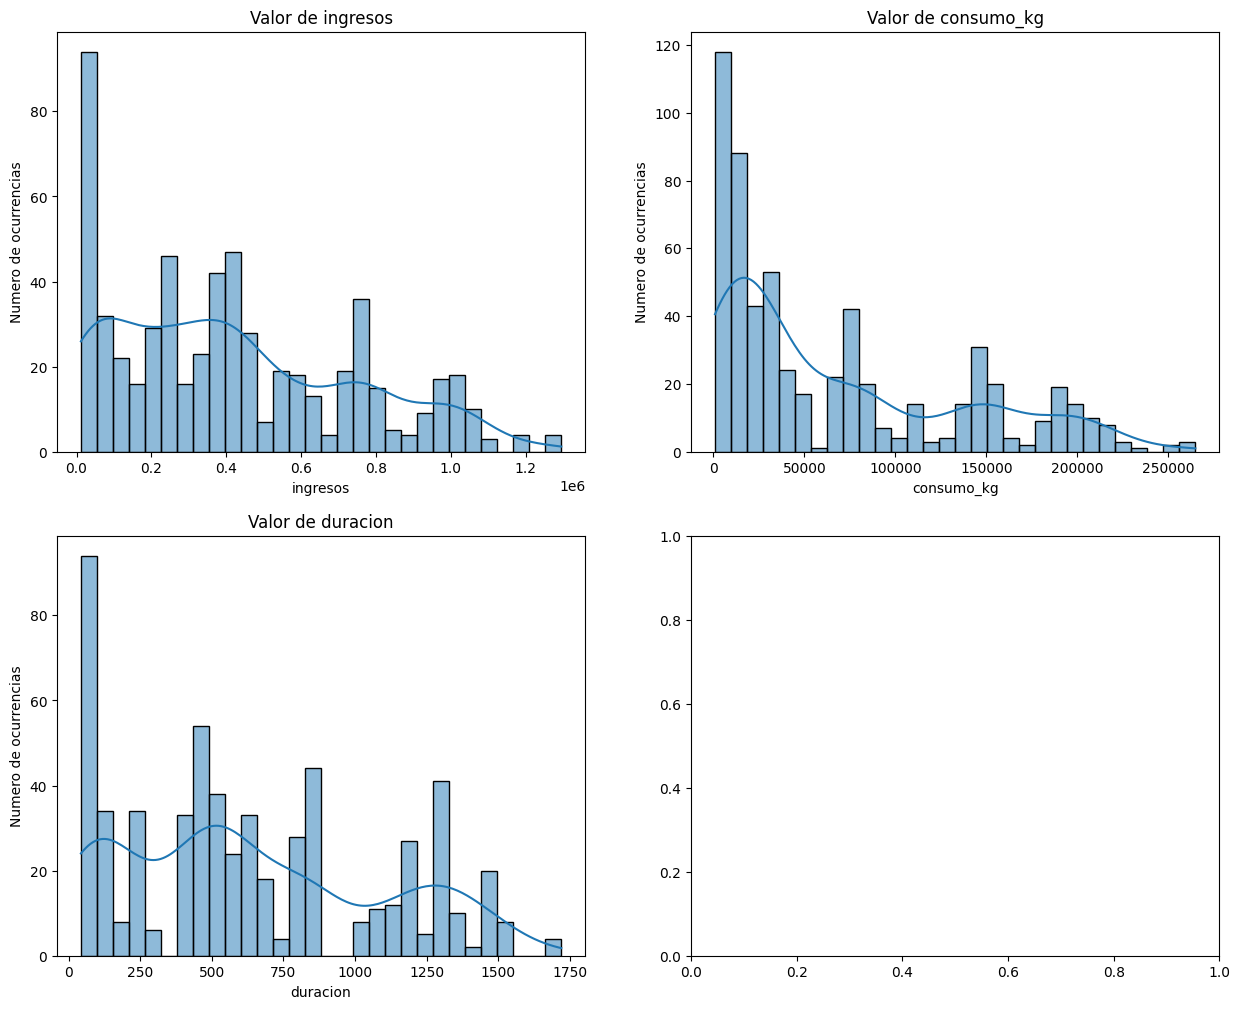

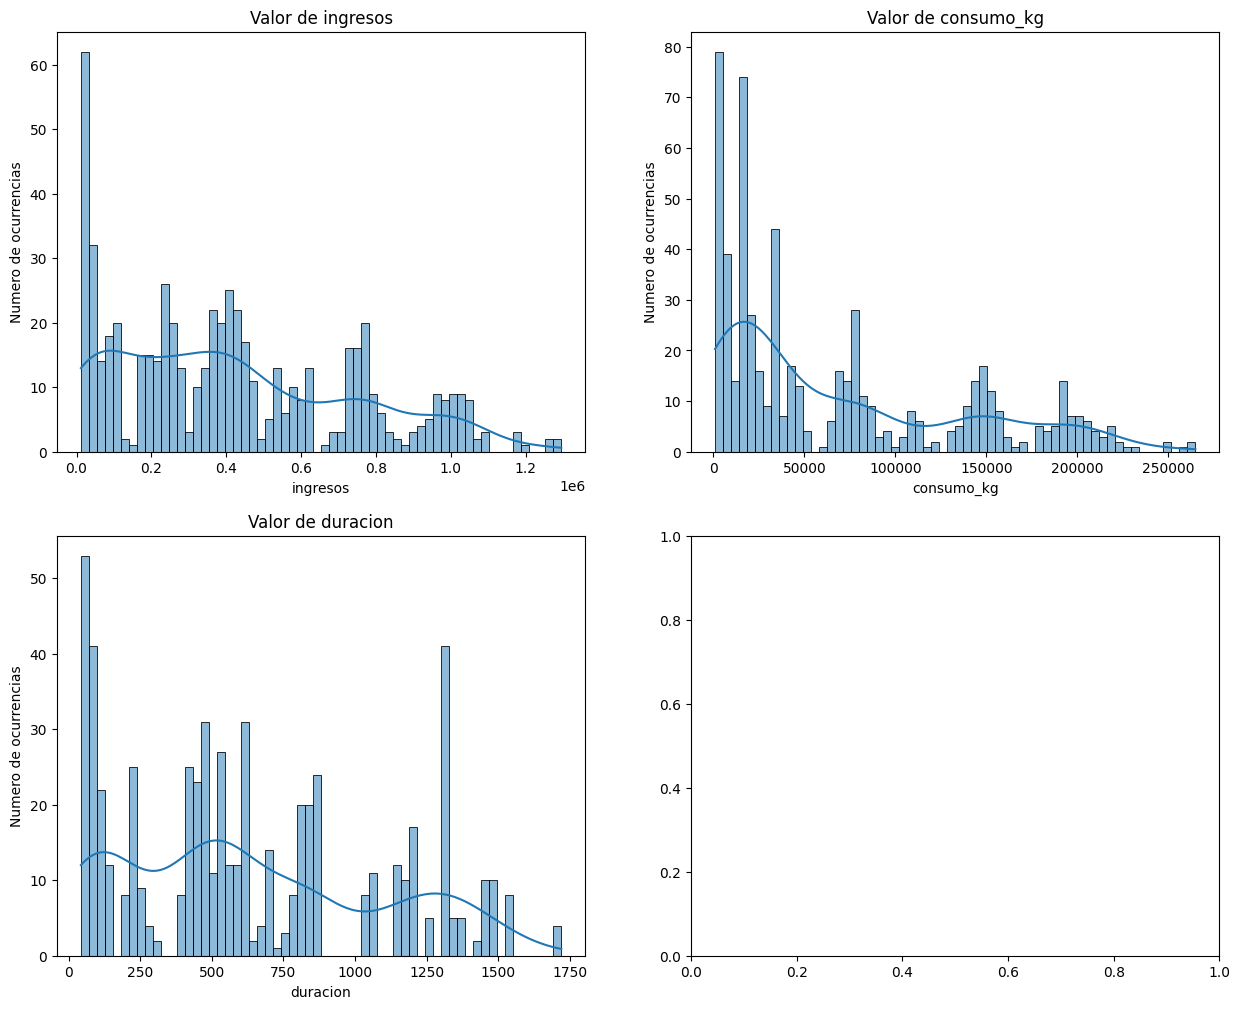

In [40]:
var = ["ingresos", "consumo_kg", "duracion"]
lista_bin = [10,30,60]
for valor in lista_bin:
    histog(df_v, var, valor, k=True )

### Ejercicio 6

Construye una función a la que puedas pasar un dataframe y una serie de columnas numéricas (que suponemos son series temporales o secuencias) y que pinte cada columna en una sola gráfica (de nuevo en una matriz de 2 columnas como mucho).

In [42]:
def serie_temp (df, lista):
    filas = len(lista) // 2 + len(lista)%2
    fig,axs = plt.subplots(filas, 2, figsize=(15,12))
    for i in range(len(lista)):
        sns.lineplot(x=df.index, y = lista[i], data = df, ax = axs[i//2, i%2])
        axs[i//2, i%2].set_title(f"{lista[i]}") 


### Ejercicio 7
`open`,`close`,`high`,`low`
Visualiza las columnas `open`,`close`,`high`,`low` del dataset de Bitcoin. 

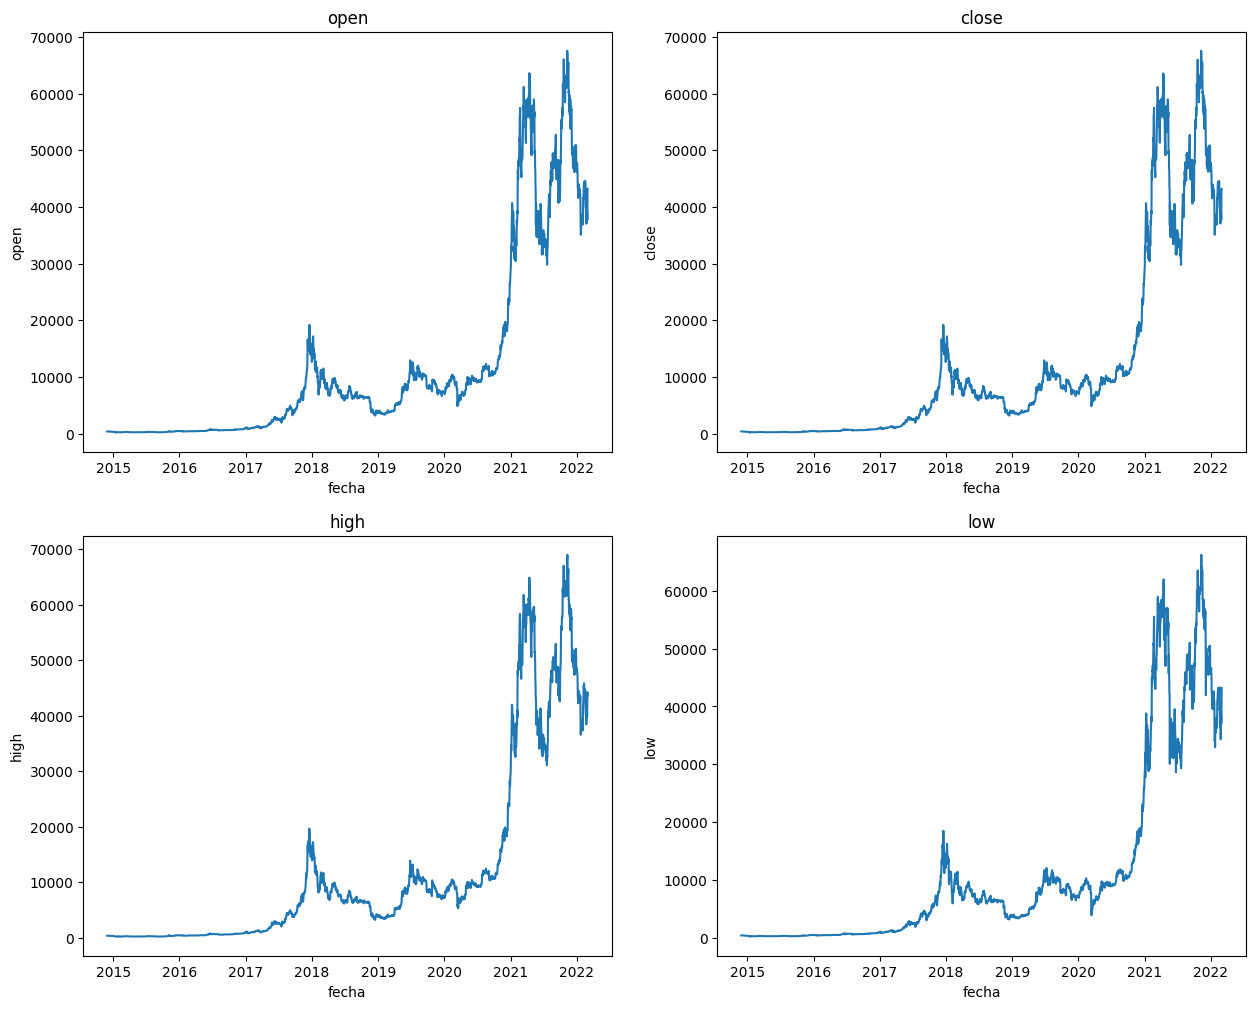

In [43]:
lista = ["open","close","high","low"]
serie_temp (df_b, lista)

### Ejercicio 8

Añade tres argumentos a la funcion del ejercicio 6. El primero debe permitir pintar una sola gráfica con todas las líneas de evolución juntas y añadir una leyenda. El segundo debe permitir colocar una fecha de inicio y el tercero una fecha de fin. Si no se dan valores a estos argumentos la figura debe contemplarlos todos, si se dan la figura sólo debe mostrar los valores comprendidos entre esas fechas. Supon que la fecha es el índice del DataFrame. De nuevo las gráficas deben estar pintadas con Seaborn.

### Ejercicio 9

Muestra el periodo más interesante y sólo ese de las variables `open`,`close` (de forma conjunta) del dataset de Bitcoin. Usa la función creada en el ejercicio anterior.